In [43]:
# Most Important
import pandas as pd
import numpy as np

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
sam = pd.read_csv('sample_submission2.csv')

In [3]:
test.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1
3,YAK/S/00016,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1984,2.5,2009,0,0,52,RIVERS,No,Single,No,No,1
4,YAK/S/00017,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1983,7.5,2014,1,0,69,FCT,Yes,Married,No,No,0


In [4]:
train.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [3]:
itrain = pd.get_dummies(train, columns = ['Marital_Status', 'Division', 'Channel_of_Recruitment', 'Year_of_birth', 'Gender', 'State_Of_Origin'])

In [4]:
itest = pd.get_dummies(test, columns = ['Marital_Status', 'Division', 'Channel_of_Recruitment', 'Year_of_birth', 'Gender', 'State_Of_Origin'])

In [5]:
itrain.drop(['Year_of_birth_1950', 'Year_of_birth_1952', 'Year_of_birth_1952', 'Year_of_birth_1956', 'Year_of_birth_1957'], axis=1, inplace = True)

In [6]:
for i in train.Year_of_birth:
    if i in test.Year_of_birth:
        pass
    else:
        print(i)

In [6]:
itrain.Promoted_or_Not.value_counts()

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64

In [11]:
#itrain.drop([], axis=1, inplace=True)

In [12]:
#itest.drop([],axis=1, inplace=True)

In [ ]:
#itrain.drop('Channel_of_Recruitment', axis=1, inplace=True)

In [ ]:
#itest.drop('Channel_of_Recruitment', axis=1, inplace=True)

In [13]:
itrain.shape, itest.shape

((38312, 28), (16496, 27))

In [14]:
train.Qualification.value_counts()

First Degree or HND         25578
MSc, MBA and PhD            10469
Non-University Education      586
Name: Qualification, dtype: int64

In [6]:
itrain['Qualification'][itrain['Qualification'] == 'MSc, MBA and PhD'] = 0
itrain['Qualification'][itrain['Qualification'] == 'First Degree or HND'] = 1
itrain['Qualification'][itrain['Qualification'] == 'Non-University Education'] = 2

In [7]:
itest['Qualification'][itest['Qualification'] == 'MSc, MBA and PhD'] = 0
itest['Qualification'][itest['Qualification'] == 'First Degree or HND'] = 1
itest['Qualification'][itest['Qualification'] == 'Non-University Education'] = 2

In [9]:
itrain.Trainings_Attended.value_counts()

2     30981
3      5631
4      1244
5       316
6        93
7        28
8         6
10        5
11        4
9         4
Name: Trainings_Attended, dtype: int64

In [8]:
itrain['Trainings_Attended'][itrain['Trainings_Attended'] == 11] = 0
itrain['Trainings_Attended'][itrain['Trainings_Attended'] == 10] = 1
itrain['Trainings_Attended'][itrain['Trainings_Attended'] == 9] = 2
itrain['Trainings_Attended'][itrain['Trainings_Attended'] == 8] = 3
itrain['Trainings_Attended'][itrain['Trainings_Attended'] == 7] = 4
itrain['Trainings_Attended'][itrain['Trainings_Attended'] == 6] = 5
itrain['Trainings_Attended'][itrain['Trainings_Attended'] == 5] = 6
itrain['Trainings_Attended'][itrain['Trainings_Attended'] == 4] = 7
itrain['Trainings_Attended'][itrain['Trainings_Attended'] == 3] = 8
itrain['Trainings_Attended'][itrain['Trainings_Attended'] == 2] = 9

In [9]:
itest['Trainings_Attended'][itest['Trainings_Attended'] == 11] = 0
itest['Trainings_Attended'][itest['Trainings_Attended'] == 10] = 1
itest['Trainings_Attended'][itest['Trainings_Attended'] == 9] = 2
itest['Trainings_Attended'][itest['Trainings_Attended'] == 8] = 3
itest['Trainings_Attended'][itest['Trainings_Attended'] == 7] = 4
itest['Trainings_Attended'][itest['Trainings_Attended'] == 6] = 5
itest['Trainings_Attended'][itest['Trainings_Attended'] == 5] = 6
itest['Trainings_Attended'][itest['Trainings_Attended'] == 4] = 7
itest['Trainings_Attended'][itest['Trainings_Attended'] == 3] = 8
itest['Trainings_Attended'][itest['Trainings_Attended'] == 2] = 9

In [18]:
itrain.No_of_previous_employers.value_counts()

1              18867
0              13272
2               1918
3               1587
4               1324
5                943
More than 5      401
Name: No_of_previous_employers, dtype: int64

In [19]:
itrain.Targets_met.value_counts()

0    24788
1    13524
Name: Targets_met, dtype: int64

In [10]:
itrain['Targets_met'][itrain['Targets_met'] == 1] = 0
itrain['Targets_met'][itrain['Targets_met'] == 0] = 1

In [11]:
itest['Targets_met'][itest['Targets_met'] == 1] = 0
itest['Targets_met'][itest['Targets_met'] == 0] = 1

In [22]:
itrain.Previous_Award.value_counts()

0    37425
1      887
Name: Previous_Award, dtype: int64

In [23]:
1 in itrain.Previous_Award

True

In [12]:
itrain['Previous_Award'][itrain['Previous_Award'] == 1] = 0
itrain['Previous_Award'][itrain['Previous_Award'] == 0] = 1

In [13]:
itest['Previous_Award'][itest['Previous_Award'] == 1] = 0
itest['Previous_Award'][itest['Previous_Award'] == 0] = 1

In [14]:
itrain['No_of_previous_employers'][itrain['No_of_previous_employers'] == 'More than 5'] = 0
itrain['No_of_previous_employers'][itrain['No_of_previous_employers'] == 5] = 1
itrain['No_of_previous_employers'][itrain['No_of_previous_employers'] == 4] = 2
itrain['No_of_previous_employers'][itrain['No_of_previous_employers'] == 3] = 3
itrain['No_of_previous_employers'][itrain['No_of_previous_employers'] == 2] = 4
itrain['No_of_previous_employers'][itrain['No_of_previous_employers'] == 1] = 5
itrain['No_of_previous_employers'][itrain['No_of_previous_employers'] == 0] = 6

In [15]:
itest['No_of_previous_employers'][itest['No_of_previous_employers'] == 'More than 5'] = 0
itest['No_of_previous_employers'][itest['No_of_previous_employers'] == 5] = 1
itest['No_of_previous_employers'][itest['No_of_previous_employers'] == 4] = 2
itest['No_of_previous_employers'][itest['No_of_previous_employers'] == 3] = 3
itest['No_of_previous_employers'][itest['No_of_previous_employers'] == 2] = 4
itest['No_of_previous_employers'][itest['No_of_previous_employers'] == 1] = 5
itest['No_of_previous_employers'][itest['No_of_previous_employers'] == 0] = 6

In [17]:
itrain.Last_performance_score.value_counts()

7.5     12993
12.5     8213
10.0     6932
2.5      4325
5.0      2944
0.0      2905
Name: Last_performance_score, dtype: int64

In [17]:
itrain['Last_performance_score'][itrain['Last_performance_score'] == 12.5] = 0
itrain['Last_performance_score'][itrain['Last_performance_score'] == 10.0] = 1
itrain['Last_performance_score'][itrain['Last_performance_score'] == 7.5] = 2
itrain['Last_performance_score'][itrain['Last_performance_score'] == 5.0] = 3
itrain['Last_performance_score'][itrain['Last_performance_score'] == 2.5] = 4
itrain['Last_performance_score'][itrain['Last_performance_score'] == 0.0] = 5


In [19]:
itest.Last_performance_score.value_counts()

7.5     5625
12.5    3528
10.0    2945
2.5     1898
5.0     1281
0.0     1219
Name: Last_performance_score, dtype: int64

In [18]:
itest['Last_performance_score'][itest['Last_performance_score'] == 12.5] = 0
itest['Last_performance_score'][itest['Last_performance_score'] == 10.0] = 1
itest['Last_performance_score'][itest['Last_performance_score'] == 7.5] = 2
itest['Last_performance_score'][itest['Last_performance_score'] == 5.0] = 3
itest['Last_performance_score'][itest['Last_performance_score'] == 2.5] = 4
itest['Last_performance_score'][itest['Last_performance_score'] == 0.0] = 5


In [54]:
for i in itrain.columns:
    if i in itest.columns:
        pass
    else:
        print(i)

Year_of_birth_1955


In [19]:
#itrain = pd.get_dummies(itrain, columns=['Year_of_recruitment'])
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1982] = 0
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1985] = 1
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1986] = 2
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1987] = 3
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1988] = 4
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1989] = 5
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1990] = 6
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1991] = 7
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1992] = 8
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1993] = 9
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1994] = 10
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1995] = 11
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1996] = 12
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1997] = 13
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1998] = 14
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 1999] = 15
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2000] = 16
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2001] = 17
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2002] = 18
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2003] = 19
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2004] = 20
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2005] = 21
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2006] = 22
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2007] = 23
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2008] = 24
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2009] = 25
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2010] = 26
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2011] = 27
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2012] = 28
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2013] = 29
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2014] = 30
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2015] = 31
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2016] = 32
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2017] = 31
itrain.Year_of_recruitment[itrain.Year_of_recruitment == 2018] = 32

In [20]:
#itrain = pd.get_dummies(itrain, columns=['Year_of_recruitment'])
itest.Year_of_recruitment[itest.Year_of_recruitment == 1982] = 0
itest.Year_of_recruitment[itest.Year_of_recruitment == 1985] = 1
itest.Year_of_recruitment[itest.Year_of_recruitment == 1986] = 2
itest.Year_of_recruitment[itest.Year_of_recruitment == 1987] = 3
itest.Year_of_recruitment[itest.Year_of_recruitment == 1988] = 4
itest.Year_of_recruitment[itest.Year_of_recruitment == 1989] = 5
itest.Year_of_recruitment[itest.Year_of_recruitment == 1990] = 6
itest.Year_of_recruitment[itest.Year_of_recruitment == 1991] = 7
itest.Year_of_recruitment[itest.Year_of_recruitment == 1992] = 8
itest.Year_of_recruitment[itest.Year_of_recruitment == 1993] = 9
itest.Year_of_recruitment[itest.Year_of_recruitment == 1994] = 10
itest.Year_of_recruitment[itest.Year_of_recruitment == 1995] = 11
itest.Year_of_recruitment[itest.Year_of_recruitment == 1996] = 12
itest.Year_of_recruitment[itest.Year_of_recruitment == 1997] = 13
itest.Year_of_recruitment[itest.Year_of_recruitment == 1998] = 14
itest.Year_of_recruitment[itest.Year_of_recruitment == 1999] = 15
itest.Year_of_recruitment[itest.Year_of_recruitment == 2000] = 16
itest.Year_of_recruitment[itest.Year_of_recruitment == 2001] = 17
itest.Year_of_recruitment[itest.Year_of_recruitment == 2002] = 18
itest.Year_of_recruitment[itest.Year_of_recruitment == 2003] = 19
itest.Year_of_recruitment[itest.Year_of_recruitment == 2004] = 20
itest.Year_of_recruitment[itest.Year_of_recruitment == 2005] = 21
itest.Year_of_recruitment[itest.Year_of_recruitment == 2006] = 22
itest.Year_of_recruitment[itest.Year_of_recruitment == 2007] = 23
itest.Year_of_recruitment[itest.Year_of_recruitment == 2008] = 24
itest.Year_of_recruitment[itest.Year_of_recruitment == 2009] = 25
itest.Year_of_recruitment[itest.Year_of_recruitment == 2010] = 26
itest.Year_of_recruitment[itest.Year_of_recruitment == 2011] = 27
itest.Year_of_recruitment[itest.Year_of_recruitment == 2012] = 28
itest.Year_of_recruitment[itest.Year_of_recruitment == 2013] = 29
itest.Year_of_recruitment[itest.Year_of_recruitment == 2014] = 30
itest.Year_of_recruitment[itest.Year_of_recruitment == 2015] = 31
itest.Year_of_recruitment[itest.Year_of_recruitment == 2016] = 32


In [26]:
itrain.Year_of_recruitment.value_counts()

31    9413
32    8110
30    4101
28    3909
29    3314
27    2011
26    1865
25    1497
24     619
23     570
22     472
20     422
19     394
21     376
18     293
17     269
16     230
15      90
14      53
11      51
12      46
13      38
10      35
9       27
6       22
7       21
8       20
4       13
5       11
3        8
2        7
1        4
0        1
Name: Year_of_recruitment, dtype: int64

In [ ]:
c = itrain.Year_of_recruitment.value_counts()
c = c.index

c = sort(c)

In [ ]:
"""m = itrain['Year_of_recruitment']
for i in m:
    lbl = LabelEncoder()
    lbl.fit(list(itrain[i].values))
    itrain[i] = lbl.transform(list(itrain[i].values))

print('Shape all_data : {}'.format(itrain.shape))"""

In [ ]:
"""from sklearn.preprocessing import LabelEncoder

for i in itrain.Year_of_recruitment:
    if i in c:
        lbl = LabelEncoder()
        lbl.fit(list(itrain[i].values))
        itrain[i] = lbl.transform(list(itrain[i].values))
    else:
        pass"""

In [35]:
itrain.Last_performance_score.value_counts()

2.0    12993
5.0    11118
1.0     6932
4.0     4325
3.0     2944
Name: Last_performance_score, dtype: int64

In [38]:
itrain.Targets_met.value_counts()

1    38312
Name: Targets_met, dtype: int64

In [39]:
itrain.Previous_Award.value_counts()

1    38312
Name: Previous_Award, dtype: int64

In [40]:
itrain.Training_score_average.value_counts()

41    1873
42    1867
40    1719
43    1634
52    1517
51    1447
50    1356
53    1304
44    1267
39    1219
54    1044
74    1027
49    1014
73     939
45     887
72     841
75     825
38     820
76     813
71     797
48     757
77     754
62     747
61     716
46     702
55     680
60     661
63     649
70     633
47     627
      ... 
64     516
59     513
56     510
69     492
37     472
79     459
57     422
58     410
65     353
68     347
80     299
66     286
67     281
36     231
81     214
35     136
82     135
83      81
84      72
86      54
85      52
34      41
89      36
90      31
87      31
88      30
91      24
33      18
32       5
31       1
Name: Training_score_average, Length: 61, dtype: int64

In [41]:
itrain.Foreign_schooled.value_counts()

Yes    34995
No      3317
Name: Foreign_schooled, dtype: int64

In [21]:
itrain.Foreign_schooled[itrain.Foreign_schooled == 'Yes'] = 0
itrain.Foreign_schooled[itrain.Foreign_schooled == 'No'] = 1

In [22]:
itest.Foreign_schooled[itest.Foreign_schooled == 'Yes'] = 0
itest.Foreign_schooled[itest.Foreign_schooled == 'No'] = 1

In [44]:
itrain.Past_Disciplinary_Action.value_counts()

No     38161
Yes      151
Name: Past_Disciplinary_Action, dtype: int64

In [23]:
itrain.Past_Disciplinary_Action[itrain.Past_Disciplinary_Action == 'No'] = 0
itrain.Past_Disciplinary_Action[itrain.Past_Disciplinary_Action == 'Yes'] = 1

In [24]:
itest.Past_Disciplinary_Action[itest.Past_Disciplinary_Action == 'No'] = 0
itest.Past_Disciplinary_Action[itest.Past_Disciplinary_Action == 'Yes'] = 1

In [47]:
itrain.Previous_IntraDepartmental_Movement.value_counts()

No     34709
Yes     3603
Name: Previous_IntraDepartmental_Movement, dtype: int64

In [25]:
itrain = pd.get_dummies(itrain, columns=['Previous_IntraDepartmental_Movement'])

In [26]:
itest = pd.get_dummies(itest, columns=['Previous_IntraDepartmental_Movement'])

In [27]:
itrain.Qualification = pd.to_numeric(itrain.Qualification)
itrain.Foreign_schooled = pd.to_numeric(itrain.Foreign_schooled)
itrain.Past_Disciplinary_Action = pd.to_numeric(itrain.Past_Disciplinary_Action)
itrain.No_of_previous_employers = pd.to_numeric(itrain.No_of_previous_employers)

In [28]:
itest.Qualification = pd.to_numeric(itest.Qualification)
itest.Foreign_schooled = pd.to_numeric(itest.Foreign_schooled)
itest.Past_Disciplinary_Action = pd.to_numeric(itest.Past_Disciplinary_Action)
itest.No_of_previous_employers = pd.to_numeric(itest.No_of_previous_employers)

In [27]:
itrain.head()

,EmployeeNo,Qualification,Trainings_Attended,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Foreign_schooled,Past_Disciplinary_Action,...,State_Of_Origin_OSUN,State_Of_Origin_OYO,State_Of_Origin_PLATEAU,State_Of_Origin_RIVERS,State_Of_Origin_SOKOTO,State_Of_Origin_TARABA,State_Of_Origin_YOBE,State_Of_Origin_ZAMFARA,Previous_IntraDepartmental_Movement_No,Previous_IntraDepartmental_Movement_Yes
0,YAK/S/00001,0.0,9,5.0,27,1,1,41,1,0,...,0,0,0,0,0,0,0,0,1,0
1,YAK/S/00002,1.0,9,5.0,31,1,1,52,0,0,...,0,0,0,0,0,0,0,0,1,0
2,YAK/S/00003,1.0,9,2.0,28,1,1,42,0,0,...,0,0,0,0,0,0,0,0,1,0
3,YAK/S/00004,1.0,8,4.0,25,1,1,42,0,0,...,0,0,0,0,0,0,0,0,1,0
4,YAK/S/00006,1.0,8,2.0,28,1,1,77,0,0,...,0,0,0,0,0,0,0,0,1,0


In [29]:
target_Id = itrain.EmployeeNo
itrain.drop(['EmployeeNo'], axis=1, inplace=True)


In [30]:
itrain.drop(['Year_of_birth_1955'], axis = 1, inplace=True)

In [31]:
itest.drop(['EmployeeNo'], axis=1, inplace=True)

In [32]:
for i in itrain.columns:
    itrain[i].fillna(itrain[i].mode()[0], inplace = True)

In [33]:
for i in itest.columns:
    itest[i].fillna(itest[i].mode()[0], inplace = True)

In [34]:
itrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Columns: 111 entries, Qualification to Previous_IntraDepartmental_Movement_Yes
dtypes: float64(2), int64(9), uint8(100)
memory usage: 6.9 MB


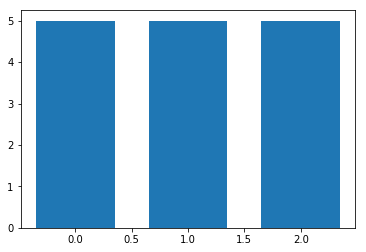

In [18]:
plt.bar(itrain.Qualification,itrain.Last_performance_score, width = 0.7)
plt.show()

# Data Scaling And Spliting

In [46]:
'''from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std_itrain = std.fit_transform(itrain)
std_itest = std.fit_transform(itest)'''

In [81]:
def using_smote(X, y):
    from imblearn.over_sampling import SMOTE
    sm = SMOTE()
    X, y = sm.fit_sample(X, y)
    return X, y

In [35]:
target = itrain.Promoted_or_Not
itrain.drop(['Promoted_or_Not'], axis=1, inplace=True)

In [83]:
train_val, target_val = using_smote(itrain, target)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test= train_test_split(itrain, target, test_size = 0.22, random_state = 42)

In [ ]:
x_train.shape, x_test.shape

In [37]:
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate = 0.2, num_boosting_rounds = 270 , max_depth=5, subsample=0.8)
xgb.fit(x_train, y_train)
xgb.score(x_train, y_train), xgb.score(x_test, y_test)

(0.9716322427344178, 0.9695438050803525)

In [45]:
pred3 = xgb.predict(x_test)
pred2 = xgb.predict(itest)

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110'] ['Qualification', 'Trainings_Attended', 'Last_performance_score', 'Year_of_recruitment', 'Targets_met', 'Previous_Award', 'Training_score_average', 'Foreign_schooled', 'Past_Disciplinary_Action', 'No_of_previous_employers', 'Marital_Status_Married', 'Marital_Status_Not_Sure', 'Marital_Status_Single', 'Division_Business Finance Operations', 'Division_Commercial Sales and Marketing', 'Division_Customer Support and Field Operations', 'Division_Information Technology and Solution Support', 'Division_Information and Strategy', 'Division_People/HR Management', 'Division_Regulatory and Legal services', 'Division_Research and Innovation', 'Division_Sourcing and Purchasing', 'Channel_of_Recruitment_Agency and others', 'Channel_of_Recruitment_Direct Internal process', 'Channel_of_Recruitment_Referral and Special candidates', 'Year_of_birth_1958', 'Year_of_birth_1959', 'Year_of_birth_1960', 'Year_of_birth_1961', 'Year_of_birth_1962', 'Year_of_birth_1963', 'Year_of_birth_1964', 'Year_of_birth_1965', 'Year_of_birth_1966', 'Year_of_birth_1967', 'Year_of_birth_1968', 'Year_of_birth_1969', 'Year_of_birth_1970', 'Year_of_birth_1971', 'Year_of_birth_1972', 'Year_of_birth_1973', 'Year_of_birth_1974', 'Year_of_birth_1975', 'Year_of_birth_1976', 'Year_of_birth_1977', 'Year_of_birth_1978', 'Year_of_birth_1979', 'Year_of_birth_1980', 'Year_of_birth_1981', 'Year_of_birth_1982', 'Year_of_birth_1983', 'Year_of_birth_1984', 'Year_of_birth_1985', 'Year_of_birth_1986', 'Year_of_birth_1987', 'Year_of_birth_1988', 'Year_of_birth_1989', 'Year_of_birth_1990', 'Year_of_birth_1991', 'Year_of_birth_1992', 'Year_of_birth_1993', 'Year_of_birth_1994', 'Year_of_birth_1995', 'Year_of_birth_1996', 'Year_of_birth_1997', 'Year_of_birth_1998', 'Year_of_birth_1999', 'Year_of_birth_2000', 'Year_of_birth_2001', 'Gender_Female', 'Gender_Male', 'State_Of_Origin_ABIA', 'State_Of_Origin_ADAMAWA', 'State_Of_Origin_AKWA IBOM', 'State_Of_Origin_ANAMBRA', 'State_Of_Origin_BAUCHI', 'State_Of_Origin_BAYELSA', 'State_Of_Origin_BENUE', 'State_Of_Origin_BORNO', 'State_Of_Origin_CROSS RIVER', 'State_Of_Origin_DELTA', 'State_Of_Origin_EBONYI', 'State_Of_Origin_EDO', 'State_Of_Origin_EKITI', 'State_Of_Origin_ENUGU', 'State_Of_Origin_FCT', 'State_Of_Origin_GOMBE', 'State_Of_Origin_IMO', 'State_Of_Origin_JIGAWA', 'State_Of_Origin_KADUNA', 'State_Of_Origin_KANO', 'State_Of_Origin_KATSINA', 'State_Of_Origin_KEBBI', 'State_Of_Origin_KOGI', 'State_Of_Origin_KWARA', 'State_Of_Origin_LAGOS', 'State_Of_Origin_NASSARAWA', 'State_Of_Origin_NIGER', 'State_Of_Origin_OGUN', 'State_Of_Origin_ONDO', 'State_Of_Origin_OSUN', 'State_Of_Origin_OYO', 'State_Of_Origin_PLATEAU', 'State_Of_Origin_RIVERS', 'State_Of_Origin_SOKOTO', 'State_Of_Origin_TARABA', 'State_Of_Origin_YOBE', 'State_Of_Origin_ZAMFARA', 'Previous_IntraDepartmental_Movement_No', 'Previous_IntraDepartmental_Movement_Yes']
expected f67, f38, f101, f20, f22, f55, f58, f4, f96, f3, f102, f63, f51, f66, f100, f103, f73, f106, f82, f72, f79, f10, f33, f23, f98, f41, f69, f71, f91, f80, f6, f74, f49, f39, f1, f42, f8, f0, f25, f29, f83, f5, f17, f44, f107, f28, f89, f97, f11, f87, f12, f21, f50, f52, f70, f77, f86, f95, f99, f27, f57, f78, f93, f68, f26, f30, f94, f36, f56, f2, f75, f18, f37, f65, f90, f40, f60, f84, f46, f14, f104, f13, f15, f108, f7, f32, f35, f62, f34, f61, f64, f81, f105, f53, f9, f16, f19, f54, f24, f59, f76, f110, f48, f45, f43, f92, f109, f47, f85, f88, f31 in input data
training data did not have the following fields: Channel_of_Recruitment_Direct Internal process, State_Of_Origin_KANO, State_Of_Origin_FCT, Year_of_birth_1964, State_Of_Origin_LAGOS, Year_of_birth_1958, State_Of_Origin_OYO, Year_of_birth_1986, Year_of_birth_1987, Year_of_birth_1993, Year_of_birth_1989, Year_of_birth_1997, State_Of_Origin_EBONYI, Year_of_birth_1965, Year_of_birth_1973, Trainings_Attended, Past_Disciplinary_Action, State_Of_Origin_CROSS RIVER, State_Of_Origin_GOMBE, Division_Research and Innovation, Year_of_birth_1962, Marital_Status_Not_Sure, Training_score_average, Year_of_birth_1981, Year_of_birth_1969, State_Of_Origin_KEBBI, Year_of_birth_1980, Year_of_birth_1999, State_Of_Origin_OSUN, Year_of_birth_1972, Gender_Male, Year_of_birth_2001, Division_Information Technology and Solution Support, State_Of_Origin_RIVERS, Division_Regulatory and Legal services, Year_of_birth_1979, Year_of_recruitment, State_Of_Origin_KATSINA, State_Of_Origin_ADAMAWA, Year_of_birth_1966, Year_of_birth_1977, State_Of_Origin_KADUNA, State_Of_Origin_OGUN, Year_of_birth_1959, Year_of_birth_1961, Division_Information and Strategy, Channel_of_Recruitment_Referral and Special candidates, Year_of_birth_1963, Year_of_birth_1994, Previous_Award, State_Of_Origin_ENUGU, No_of_previous_employers, Channel_of_Recruitment_Agency and others, Foreign_schooled, State_Of_Origin_EKITI, Division_Sourcing and Purchasing, Year_of_birth_1971, State_Of_Origin_ZAMFARA, State_Of_Origin_BAYELSA, Year_of_birth_1982, Year_of_birth_1996, Marital_Status_Married, Marital_Status_Single, State_Of_Origin_AKWA IBOM, State_Of_Origin_SOKOTO, Year_of_birth_1968, Year_of_birth_1998, State_Of_Origin_NASSARAWA, State_Of_Origin_YOBE, State_Of_Origin_PLATEAU, State_Of_Origin_TARABA, Division_People/HR Management, Year_of_birth_1978, Year_of_birth_1983, State_Of_Origin_NIGER, State_Of_Origin_ONDO, State_Of_Origin_BENUE, Targets_met, Year_of_birth_1988, Qualification, Year_of_birth_1990, Division_Customer Support and Field Operations, Year_of_birth_1984, Year_of_birth_1992, State_Of_Origin_EDO, State_Of_Origin_KWARA, State_Of_Origin_BORNO, State_Of_Origin_ANAMBRA, Year_of_birth_1974, State_Of_Origin_IMO, Division_Commercial Sales and Marketing, Year_of_birth_1991, Gender_Female, Year_of_birth_1970, Year_of_birth_1985, State_Of_Origin_ABIA, Year_of_birth_2000, State_Of_Origin_BAUCHI, State_Of_Origin_DELTA, Year_of_birth_1960, Previous_IntraDepartmental_Movement_No, Previous_IntraDepartmental_Movement_Yes, Year_of_birth_1975, Division_Business Finance Operations, Year_of_birth_1967, Year_of_birth_1995, State_Of_Origin_JIGAWA, Year_of_birth_1976, State_Of_Origin_KOGI, Last_performance_score

In [48]:
f1_score(pred3, y_test)

NameError: name 'pred3' is not defined

In [47]:
# see the overall performance of the data
from sklearn.metrics import classification_report
print('çlassification_report')
print(classification_report(pred3, y_test))

çlassification_report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      8102
           1       0.94      1.00      0.97      7330

   micro avg       0.97      0.97      0.97     15432
   macro avg       0.97      0.97      0.97     15432
weighted avg       0.97      0.97      0.97     15432



In [48]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train), lr.score(x_test, y_test)

(0.6837872418205081, 0.6895412130637636)

In [52]:
itrain.shape, itest.shape

((38312, 111), (16496, 110))

In [50]:
pred = lr.predict(itest)

In [51]:
pred1 = lr.predict(x_test)

In [52]:
f1_score(pred1, y_test)

0.6540756863020432

In [88]:
# Import libraries >>>
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb


In [89]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))


In [90]:
lasso.fit(x_train, y_train)
lasso.score(x_train, y_train), lasso.score(x_test, y_test)

(0.1962154365920067, 0.19592534663871397)

In [40]:
# using the GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 270, random_state=5, max_features='auto', max_depth=5)
model.fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9621523943379179, 0.9302408352117689)

In [41]:
# predict using the x_test
pred2 = model.predict(x_test)
# predict using the itest data
pred2a = model.predict(itest)

In [42]:
# see the overall performance of the data
from sklearn.metrics import classification_report
print('çlassification_report')
print(classification_report(pred2, y_test))

çlassification_report
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      8119
           1       0.31      0.71      0.43       310

   micro avg       0.93      0.93      0.93      8429
   macro avg       0.65      0.83      0.70      8429
weighted avg       0.96      0.93      0.94      8429



In [ ]:
target_Id = test.EmployeeNo
output = pd.DataFrame(data = {'EmployeeNo':target_Id, 'Promoted_or_Not':pred2a})
output.to_csv(path_or_buf = 'gb-nbumiepredi.csv', index = False, quoting = 3)

In [62]:
target_Id = test.EmployeeNo

In [50]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [51]:
penalty = ['l1', 'l2']
C = [0.01, 0.1, 0.2, 1, 10, 20, 100]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty,
                  C=C,
                  class_weight=class_weight,
                  solver=solver)

grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    verbose=1,
                    n_jobs=4)
grid_result = grid.fit(x_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed: 42.5min finished


Best Score:  0.7292016785561579
Best Params:  {'C': 0.1, 'class_weight': {1: 0.7, 0: 0.3}, 'penalty': 'l1', 'solver': 'liblinear'}


In [52]:
grid.fit(x_train, y_train)

Fitting 3 folds for each of 128 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 27.2min
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed: 49.2min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'class_weight': [{1: 0.5, 0: 0.5}, {1: 0.4, 0: 0.6}, {1: 0.6, 0: 0.4}, {1: 0.7, 0: 0.3}], 'solver': ['liblinear', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [53]:
grid.score(x_train, y_train),grid.score(x_test, y_test)

(0.7317229157106473, 0.7259391980513397)

In [54]:
pred = grid.predict(x_test)

In [93]:
pred = grid.predict(itest)

In [89]:
f1_score(pred, y_test)

0.4267241379310345

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier()
learning_rate = [0.2,2,20]

n_estimators = [100,200,400]

param_grid = dict(learning_rate = learning_rate,
                 n_estimators = n_estimators)

grid = GridSearchCV(estimator=gbrt,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: 

In [ ]:
pred1 = grid.predict(x_test)

In [97]:
pred = grid.predict(itest)

In [ ]:
f1_score(pred1, y_test)

In [58]:
pred.shape

(16496,)

In [103]:
output = pd.DataFrame(data = {'EmployeeNo':target_Id, 'Promoted_or_Not':pred})
output.to_csv(path_or_buf = 'gridclassbumiepredi.csv', index = False, quoting = 3)

In [47]:
S_train1

NameError: name 'S_train1' is not defined

In [26]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
xgb.score(x_train, y_train), model.score(x_test, y_test)

NameError: name 'x_train' is not defined